## **Eduardo Carrasco Vidal** <img src="img/logo.png" align="right" style="width: 120px;"/>

**Doctorado en Ingeniería de Sistemas Complejos, Universidad Adolfo Ibáñez.**

**Profesor:** Gonzalo Ruz Heredia.
__Ayudante:__ Carlos Sepúlveda Morales.

**Curso:** Machine Learning (Aprendizaje Automático).

Enlace al repositorio del alumno en [GitHub](https://github.com/educarrascov/DISC_MachineLearning) _@educarrascov_

![Python](https://img.shields.io/badge/python-%2314354C.svg) 

____

## Instrucciones
* La tarea es individual
* Por favor responder en este mismo notebook
* Renombrar el archivo agregando su nombre, por ejemplo tarea1_Tupper_Tudor.ipynb
* Subir el archivo al link de entrega Trabajo en webcursos que será habilitado
* __Fecha de entrega:__ viernes 26 de agosto, 23:55 hrs.

____

# Tarea Nº 1: Machine Learning.

Los datos _bankData.csv_ corresponden a una campaña de marketing dirigido (por teléfono) de un banco portugués. El objetivo de clasificación es poder predecir si el cliente va a tomar o no un depósito a plazo (variable `y` ubicada en la última _fila_ de la tabla) en función de un conjunto de 18 atributos descritos en el archivo [Atributos.pdf](https://github.com/educarrascov/DISC_MachineLearning/blob/main/Tareas/tarea1/Atributos.pdf). 

Cargue el conjunto de datos (_bankData.csv_) en este notebook y responda las preguntas.

Detalle de cada variable con descripción y tipo, se puede observar en el siguiente cuadro:

| Nº                 | Variable     | Descripción   | Tipo         |
|:--------------------:|:--------------:|---------------|--------------|
| 1 | `Age`           | Edad  |Numérico      |
| 2 | `Education`     | Educación |Categórico    |
| 3 | `Default`       | has credit in default?|Categórico    |
| 4 | `Housing`       | has housing loan?   |Categórico    |
| 5 | `Loan`          | has personal loan?   |Categórico    |
| 6 | `Contact`       | contact communication type  |Categórico    |
| 7 | `Month`         | last contact month of year   |Categórico    |
| 8 | `Day_of_Week`   | last contact day of the week  |Categórico    |
| 9 | `Duration`      | last contact duration, in seconds |Numérico      |
| 10 | `Campaign`     | number of contacts performed during this campaign and for this client|Numérico      |
| 11 | `pdays`        | number of days that passed by after the client was last contacted from a previous campaign|Numérico      |
| 12 | `previous`     | number of contacts performed before this campaign and for this client|Numérico      |
| 13 | `poutcome`     | outcome of the previous marketing campaign             |Categórico    |
| 14 | `emp.var.rate` | employment variation rate - quarterly indicator              |Numérico      |
| 15 | `cons.price.idx`| consumer price index - monthly indicator           |Numérico      |
| 16 | `cons.conf.idx`| consumer confidence index - monthly indicator              |Numérico      |
| 17 | `euribor3m`    | euribor 3 month rate - daily indicator             |Numérico      |
| 18 | `nr.employed`  | number of employees - quarterly indicator             |Numérico      |
| 19 | `y`**(output)** | has the client subscribed a term deposit?             |Categórico    |

In [1]:
#Código en caso se requiera descargar dataset de un repositorio en línea o disponible en drive (google)
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# se efectúa la carga de la base de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt 
from matplotlib.pyplot import figure
data1 = pd.read_csv('data/bankData.csv', sep=',')

Una vez efectuada la carga del dataset usando la librería pandas, se requiere verificar el detalle de las variables (shape), además de su identificación como variables categóricas o numéricas.

In [3]:
data1.info() #verificar cantidad de columnas/filas, tipos de variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   education       4119 non-null   object 
 2   default         4119 non-null   object 
 3   housing         4119 non-null   object 
 4   loan            4119 non-null   object 
 5   contact         4119 non-null   object 
 6   month           4119 non-null   object 
 7   day_of_week     4119 non-null   object 
 8   duration        4119 non-null   int64  
 9   campaign        4119 non-null   int64  
 10  pdays           4119 non-null   int64  
 11  previous        4119 non-null   int64  
 12  poutcome        4119 non-null   object 
 13  emp.var.rate    4119 non-null   float64
 14  cons.price.idx  4119 non-null   float64
 15  cons.conf.idx   4119 non-null   float64
 16  euribor3m       4119 non-null   float64
 17  nr.employed     4119 non-null   f

Como se observa, el detalle de las variables es el siguiente:
1. **Numéricas:** `age`, `duration`, `campaign`, `pdays`, `previous`, `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`.
2. **Categóricas:** `education`, `default`, `housing`, `loan`, `contact`, `month`, `day_of_week` e `y`.

Todas tienen la misma cantidad de datos (4119), sin presentar ninguno nulo.

In [4]:
data1.describe(include='all') #Estadísticas descriptivas básicas por cada variable

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119,4119,4119,4119,4119,4119,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1264,3315,2175,3349,2652,1378,860,NaN,NaN,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.788055,2.537266,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.703736,2.568159,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


Al efectuar analisis de estadísticas descriptivas, se puede observar que las variables categóricas presentan _unique_ determinados por la diversidad con la que pueden ser clasificados (etiquetados), detallando _top_ que simboliza la clase que más se repite con _freq_ indicando la mayor frecuencia.

Con respecto a las variables numéricas, estas presentan _mean_, _std, _min_, _max_, _25%_, _50%_, _75%_.

Por último, ambas presentan un _count_ con la cantidad de registros totales por variable.

Se verifican datos faltantes en cada variables en la etapa de preprocesamiento.

In [5]:
missing = data1.isnull().sum()
missing.sort_values(ascending=False)

age               0
pdays             0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
campaign          0
education         0
duration          0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
y                 0
dtype: int64

In [6]:
data1.head() ## Verificar las 5 primeras filas del dataset cargado (pd), f tail para 5 últimos.

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## A. Variables Categóricas:
Se analizan las variables categóricas.

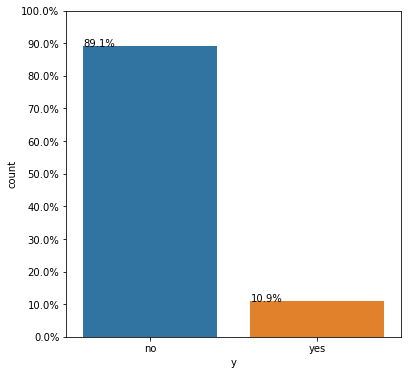

In [7]:
figure(figsize=(6,6))
total=len(data1['y'])
plot=sns.countplot(x=data1['y'],data=data1) #contador de cantidad de yes/no para la variable y

for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
plot.yaxis.set_ticks(np.linspace(0, total, 11))
plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
plt.pyplot.show()

Si se observa el gráfico obtenido, se puede determinar que la mayoría de las observaciones pertenecen a la etiqueta de clase **No**, con un 89.1%, mientras que las etiquetas de la clase **Yes** representan un 10.9%.

In [11]:
#se define la función countplot_target_variable:
def countplot_target_variable(columns,classes):
    figure(figsize=(18,6))
    total=len(data1[classes])
    plot=sns.countplot(x=columns,data=data1,hue=classes)
    for p in plot.patches:
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.pyplot.show()

### 1. Variable `education` en función de `y`:

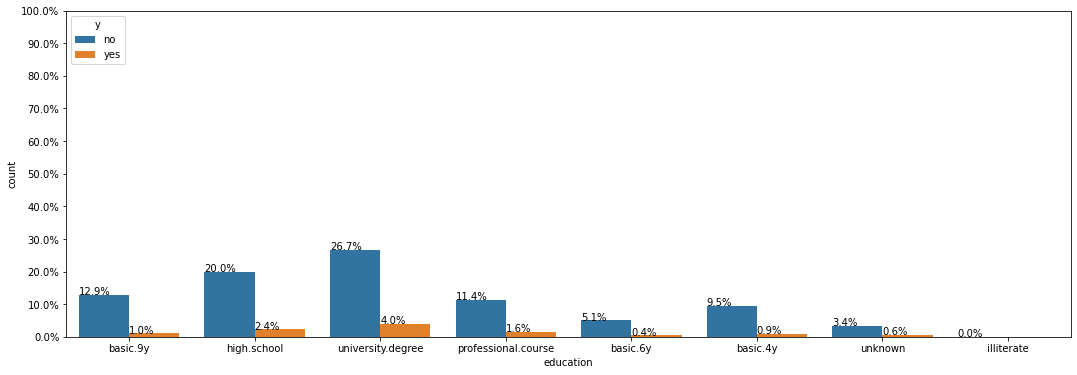

In [12]:
countplot_target_variable('education','y')

Se puede observar que las personas con grado universitario, se han suscrito más a un deposito a plazo (term deposit).

### 2. Variable `contact` en función de `y`:

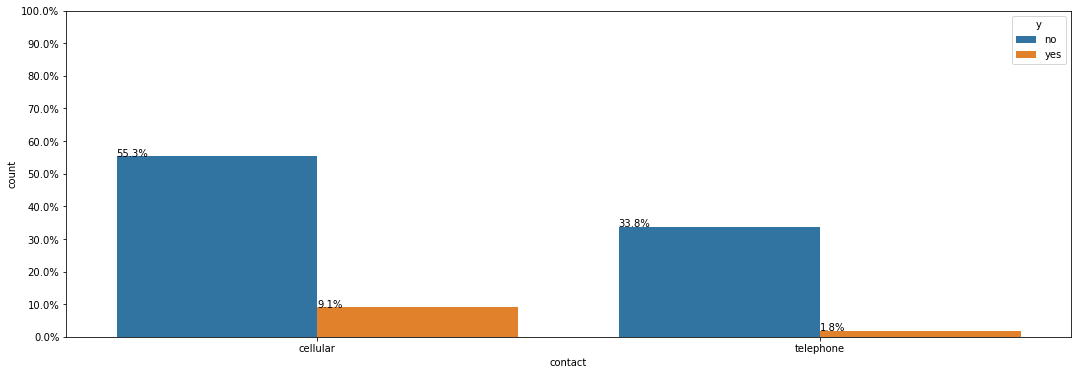

In [13]:
countplot_target_variable('contact','y')

En la base de datos, la gente que ha sido contactada por celular, ha tendido mayormente a suscribirse a un deposito a plazo.

### 3. Variable `loan` en función de `y`:

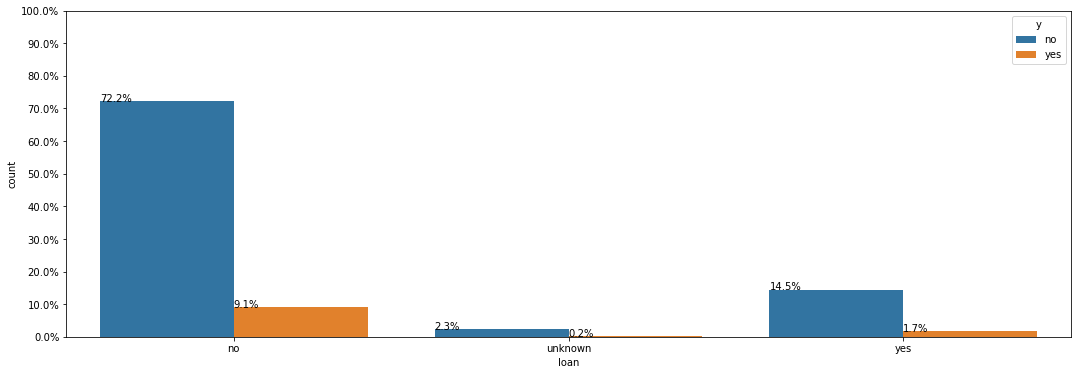

In [14]:
countplot_target_variable('loan','y')

Se puede determinar que personas que no tienen un crédito de consumo (personal loan), se han suscrito mayormente a un depósito a plazo.

### 4. Variable `month` en función de `y`:

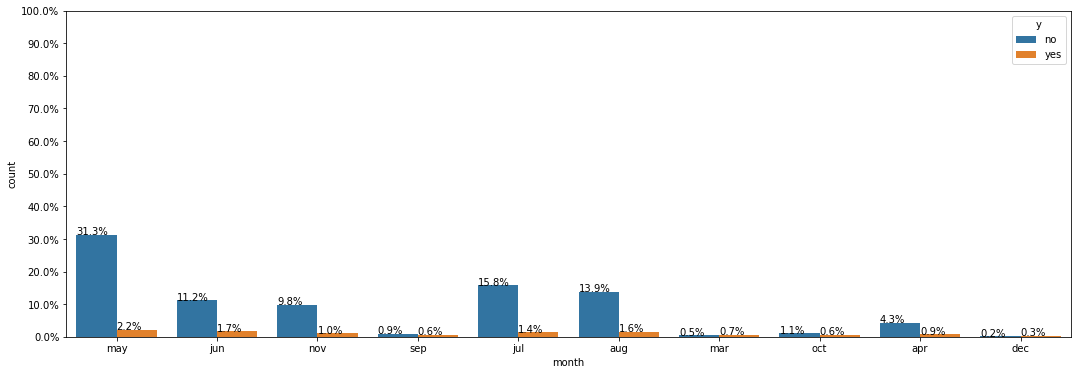

In [17]:
countplot_target_variable('month','y')

Se puede observar que mayormente mayo, es donde las personas dedicen suscribirse a un deposito a plazo.

## B. Variables Numéricas:

In [83]:
#Se define la función de densidad de probabilidad a través de la estimación de distribución de kernel:
def plotting_kde(data1,columns,hue=None):
    if hue==None:    
       plot=sns.FacetGrid(data1,height=6).map(sns.distplot,columns) #como alternativa está displot/histplot
    else:
        plot=sns.FacetGrid(data1,hue=hue,height=6).map(sns.distplot,columns)  #como alternativa está displot/histplot
        plt.pyplot.legend()

In [84]:
def violinplot_columns(columns,y='y'):
    figure(figsize=(8,4))
    sns.violinplot(x=data1[y],y=data1[columns],hue=data1['y'],showfliers=False)
    plt.pyplot.title(columns.upper())

### 1. Plotting de la variable `age`en función de `y`:

/Users/educarrasco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/educarrasco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


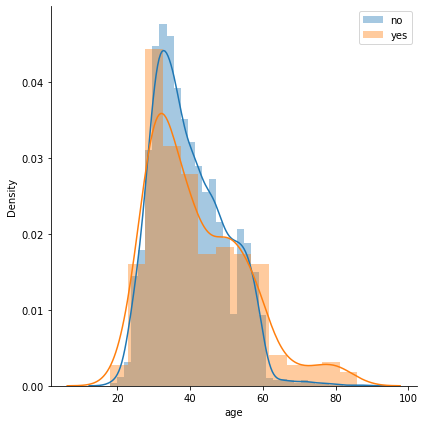

In [86]:
plotting_kde(data1,'age',hue='y')

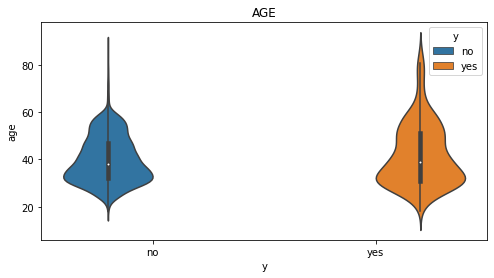

In [87]:
violinplot_columns('age')

El primer gráfico, muestra la estimación de densidad de kernel o función de ajuste de densidad de probabilidad (distribución) de una variable, en este caso, se observa que ambas funciones de distribución son similares (**yes** y **no**), por lo cual esta variable no incide mayormente en la variable output.
Con respecto a boxplot, se observa que la media para ambas clases es similar y el rango intercuartilico también es similar, por lo cual, no debería tener mayor impacto en el output.

### 2. Plotting de la Variable `duration`en función de `y`:

/Users/educarrasco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/educarrasco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


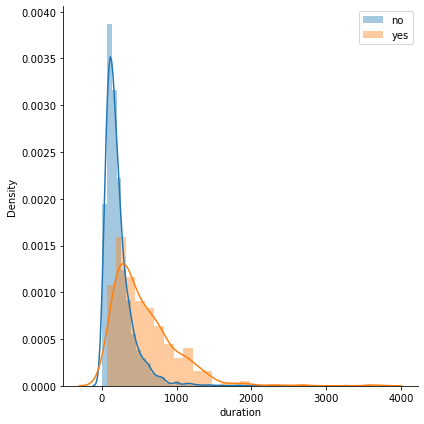

In [89]:
plotting_kde(data1,'duration',hue='y')

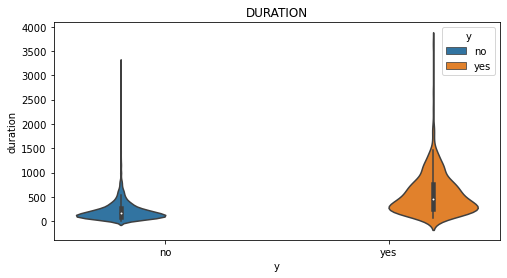

In [90]:
violinplot_columns('duration')

En este caso, en mabos gráficos se observa una diferencia en la distribución de la variable `duration`, en el primer caso, las personas que dicen **No** a suscribirse a un deposito a plazo tienen un tiempo de entre 0 - 1000, en tanto que la gente que dice **Yes** a la suscripción a un deposito a plazo, tiene una distribución de entre 0 - 2000, por lo cual preliminarmente se puede señalar que esta variable si impacta en el output (decisión).

De igual manera, se puede observar la media en el segundo gráfico, que muestra que **yes** tiene una media mayor y de igual manera un mayor rango intercuartilico.

### 3. Plotting de la Variable `campaign`en función de `y`:

/Users/educarrasco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/educarrasco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


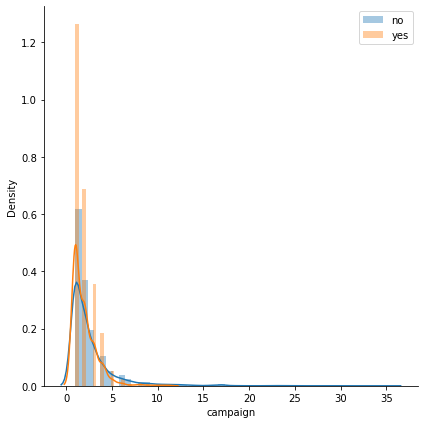

In [92]:
plotting_kde(data1,'campaign',hue='y')

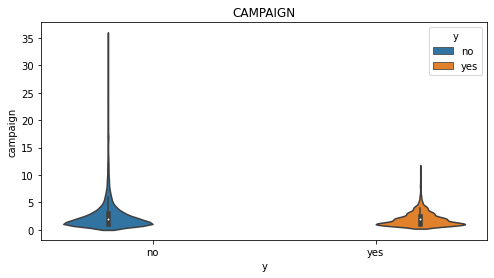

In [93]:
violinplot_columns('campaign')

En este caso, en ambos gráficos de densidad, se observa que las distribuciones, la media y el rango intercuartílico son similares en la variable `campaign`, por lo cual, no incide mayormente en la decisión (output).

### 4. Matriz de Correlación (inicial con variables numéricas):

In [94]:
def plotting_heatmap(data1):
    correlation=data1.corr()
    figure(figsize=(16,8))
        
        
    sns.heatmap(correlation, annot=True)
    plt.pyplot.show()

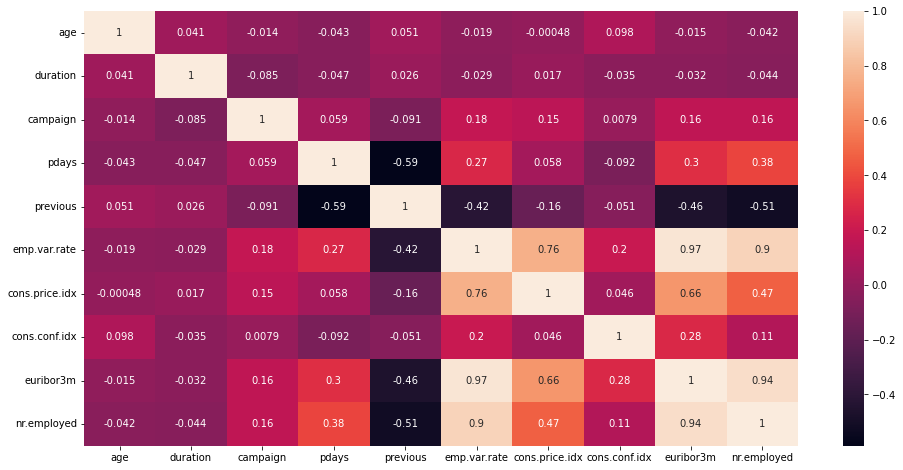

In [95]:
plotting_heatmap(data1) #obtener una matriz de correlación de valores numéricos

Esta matriz de correlación, demuestra sólo las variables numéricas, por lo cual, no tiene mayor incidencia en la decisión (output).
Objeto estandarizar las variables y determinar su impacto, se requiere efectuar una transformación de las variables categóricas a numéricas.

### 4. Tranformación de variables categóricas a numéricas:

In [96]:
## se definen dos funciones que incluyen cada tipo de datos:
cat_cols = data1.select_dtypes(include=['object']).columns.to_list() #función de variables categóricas
numeric_cols = data1.select_dtypes(include=['float64', 'int64']).columns.to_list() #función de variables numéricas

In [97]:
for v in cat_cols:
    data1[v],_ = pd.factorize(data1[v],sort=False) #se efectúa una modificación a variables categóricas

In [98]:
data1.head() #objeto verificar asignación de número a cada categoría.

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,0,0,0,0,0,0,0,487,2,999,0,0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,1,0,1,0,1,0,0,346,4,999,0,0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,1,0,0,0,1,1,1,227,1,999,0,0,1.4,94.465,-41.8,4.962,5228.1,0
3,38,0,0,2,1,1,1,0,17,3,999,0,0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,2,0,0,0,0,2,2,58,1,999,0,0,-0.1,93.200,-42.0,4.191,5195.8,0


In [99]:
data1.info() #con esto se verifica que todas las variables tengan una asignación numérica.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   education       4119 non-null   int64  
 2   default         4119 non-null   int64  
 3   housing         4119 non-null   int64  
 4   loan            4119 non-null   int64  
 5   contact         4119 non-null   int64  
 6   month           4119 non-null   int64  
 7   day_of_week     4119 non-null   int64  
 8   duration        4119 non-null   int64  
 9   campaign        4119 non-null   int64  
 10  pdays           4119 non-null   int64  
 11  previous        4119 non-null   int64  
 12  poutcome        4119 non-null   int64  
 13  emp.var.rate    4119 non-null   float64
 14  cons.price.idx  4119 non-null   float64
 15  cons.conf.idx   4119 non-null   float64
 16  euribor3m       4119 non-null   float64
 17  nr.employed     4119 non-null   f

### 5. Matriz de correlación completa:

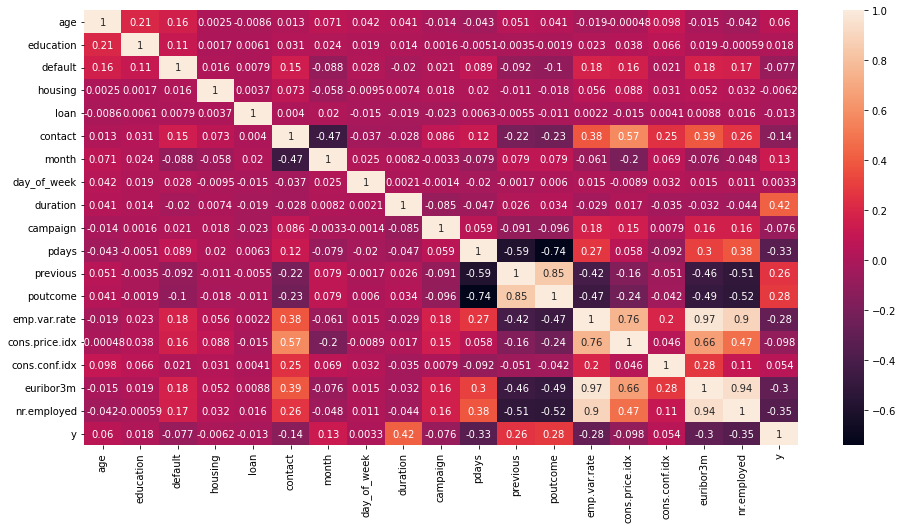

In [100]:
import matplotlib as plt 
plotting_heatmap(data1) #Finalmente graficamos la matriz de correlación con todas las variables.

Preliminarmente si observamos la correlación de la variable de salida `y`, podemos observar que existe una correlación mayor en las siguientes variables: `duration` (0.42), `poutcome` (0.28) y `previous` (0.26). Por lo cual, esas variables tienen mayor relación en la variable de salida `y`.

Cabe destacar que esta observación es coincidente con lo que se efectuó anteriormente al determinar que la función de distribución de probabilidad de la variable `duration`, mostraba diferencias significativas al dividirlas entre etiquetas **yes** y **no**.

Para las siguientes preguntas, considere las siguientes particiones de los datos

In [101]:
#primera partición
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data1.iloc[:,0:18],data1['y'],
    test_size=0.3, random_state=0)

#segunda partición
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train,y_train,
    test_size=0.2, random_state=0)

_________

## C. Pregunta 1
Usando `X_train2` (**para entrenamiento**) y `X_val` (**para evaluación**), explore una profundidad adecuada para un **árbol de decisión** tal que no sobreajuste. Luego, entrene un árbol de decisión (**con la profundidad determinada previamente**) usando el conjunto de entrenamiento `X_train` y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`. 

Grafique el árbol resultante. Señale qué le cuesta más predecir al clasificador: un cliente que si va a tomar un depósito a plazo o un cliente que no va a tomar un depósito a plazo. Justifique su respuesta.

### Respuesta:

Efectuado el split de los datos y objeto determinar la profundidad adecuada, se efectúa un test de score a ambos set (train / test), de manera de determinar cual es la profundidad adecuada.

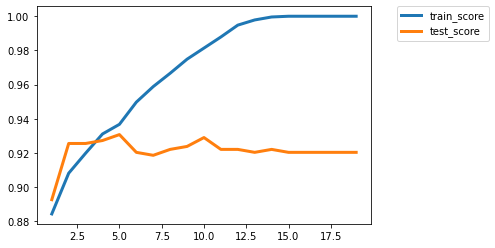

In [111]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

train_score = []
test_score = []

for depth in range(1,20):
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth).fit(X_train2, y_train2)
    train_score.append(tree.score(X_train2, y_train2))
    test_score.append(tree.score(X_val, y_val))
plt.plot(range(1,20), train_score, label="train_score", linewidth=3)
plt.plot(range(1,20), test_score, label="test_score", linewidth=3)
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', borderaxespad=0.);

Como se observa en la figura, la profundidad adecuada es de 5, con esta técnica de pre-pruning evitamos que el arbol de sobreajuste, a pesar de que aumentó el sesgo.

In [186]:
# Creación del modelo
modelo_dtc = DecisionTreeClassifier(
            max_depth         = 5, #de acuerdo a lo obtenido anteriormente
            criterion         = 'entropy',
            random_state      = 0
          )
modelo_dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [187]:
from sklearn.metrics import accuracy_score
predicciones = modelo_dtc.predict(X_test)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El Accuracy (porcentaje de clasificaciones correctas) es: {100 * round(accuracy,2)} %")

El Accuracy (porcentaje de clasificaciones correctas) es: 90.0 %


Profundidad del árbol: 5
Número de nodos terminales: 29


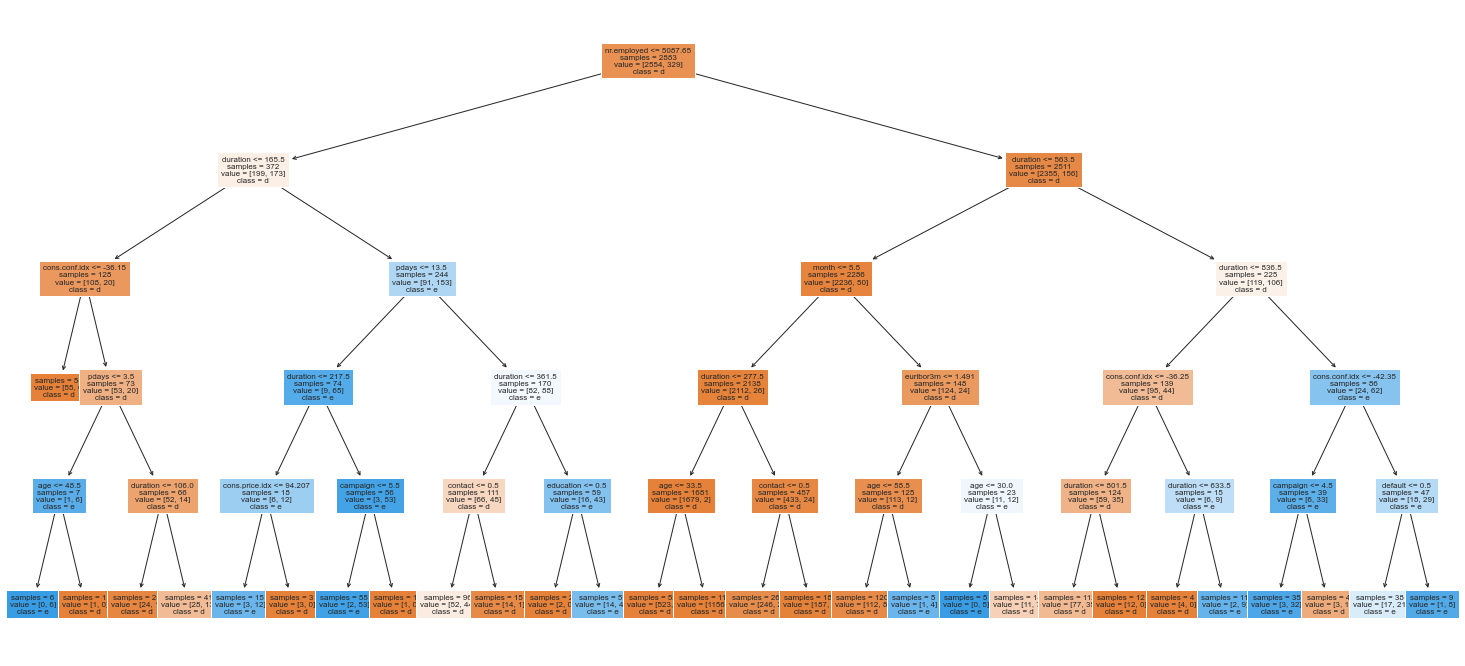

In [188]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(26, 12))

print(f"Profundidad del árbol: {modelo_dtc.get_depth()}")
print(f"Número de nodos terminales: {modelo_dtc.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo_dtc,
            feature_names = data1.drop(columns = 'y').columns.tolist(),
            class_names   = 'deposito_plazo',
            filled        = True,
            impurity      = False,
            fontsize      = 8,
            ax            = ax
       )

In [189]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones)
print(cf_matrix)

[[1066   48]
 [  81   41]]


<AxesSubplot:>

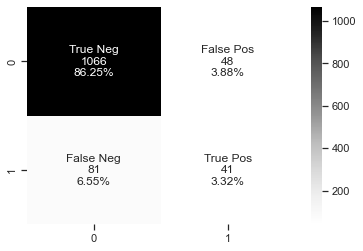

In [190]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

In [191]:
print(f"Porc. de error para el NO: {round(cf_matrix[0,1]/cf_matrix[0].sum(),2)*100}%")
print(f"Porc. de error para el SI: {round(cf_matrix[1,0]/cf_matrix[1].sum(),2)*100}%")

Porc. de error para el NO: 4.0%
Porc. de error para el SI: 66.0%


_________

## D. Pregunta 2:
En base al árbol resultante. Cuál es el atributo más importante para este problema de clasificación. Qué atributos no contribuyen (son irrelevantes) para este problema de clasificación.

### Respuesta:

In [201]:
print("Feature importances:\n{}".format(modelo_dtc.feature_importances_)) #muestra sólo las features por nivel de importancia pero sin label

Feature importances:
[0.0270791  0.0043815  0.00325516 0.         0.         0.02323838
 0.05583834 0.         0.49129055 0.01192175 0.03550797 0.
 0.         0.         0.00639734 0.02977903 0.01643861 0.29487228]


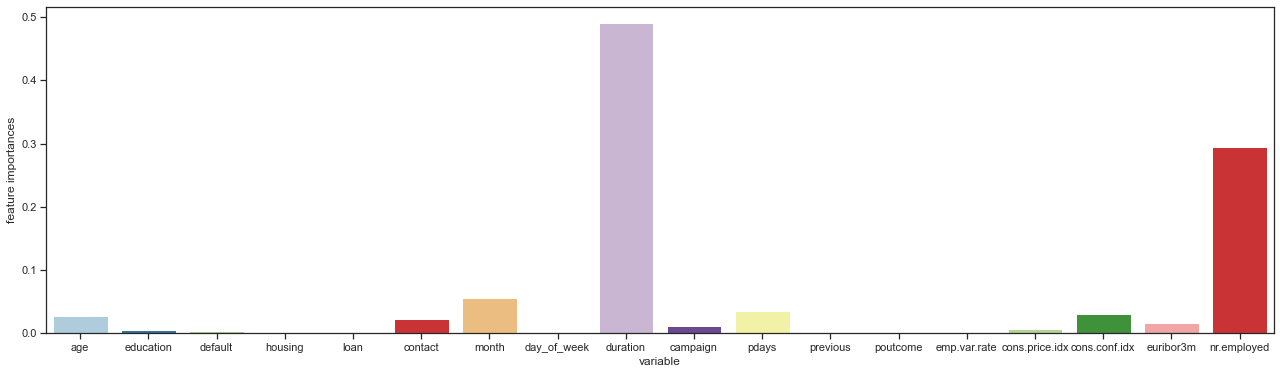

In [202]:
import seaborn as sns
feature_importance = pd.DataFrame( {'variable': data1.drop(columns = 'y').columns,
                             'feature importances': modelo_dtc.feature_importances_})
sns.set_theme(style="ticks")
figure(figsize=(22,6))
ax = sns.barplot(x='variable', y='feature importances', data=feature_importance, palette="Paired")

In [203]:
feature_importance.sort_values('feature importances', ascending=False)

,variable,feature importances
8,duration,0.491291
17,nr.employed,0.294872
6,month,0.055838
10,pdays,0.035508
15,cons.conf.idx,0.029779
0,age,0.027079
5,contact,0.023238
16,euribor3m,0.016439
9,campaign,0.011922
14,cons.price.idx,0.006397


In [204]:
# se crea una lista, de las variable cuya importancia es menor a 0.01
less_important = feature_importance.sort_values('feature importances', ascending=False)
less_important[less_important['feature importances']<=0.01]['variable'].to_list()

['cons.price.idx',
 'education',
 'default',
 'day_of_week',
 'loan',
 'housing',
 'previous',
 'poutcome',
 'emp.var.rate']

__________

## E. Referencias:

1. 
2.
